In [1]:
from pylab import np
import matplotlib.pyplot as plt

In [2]:
def euler(y, t, dt, deriv): # Euler method y_i+1 → y_i
    ynext = y + deriv(y,t) * dt
    return ynext

def rk2(y, t, dt, derivs): # rk2 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1,t + dt)
    y_next = y + 0.5 * (k1 + k2)
    return y_next

def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

def growth( yi, ti): # diff eqn
    dydt = lbda*yi
    return dydt

In [3]:
N = 1000 # number of steps
dt = 0.002 # time interval [s]
tf = dt * float(N-1) # time step [s]
t = np.linspace(0, tf, N) # time array

lbda = 1.0 # growth constant [s^-1]
yo = 1.0 # initial population

ye = np.zeros([N]) # y0, y1, ... array
yrk2 = np.zeros([N])
yrk4 = np.zeros([N])

ye[0]   = yo # initial condition
yrk2[0] = yo
yrk4[0] = yo

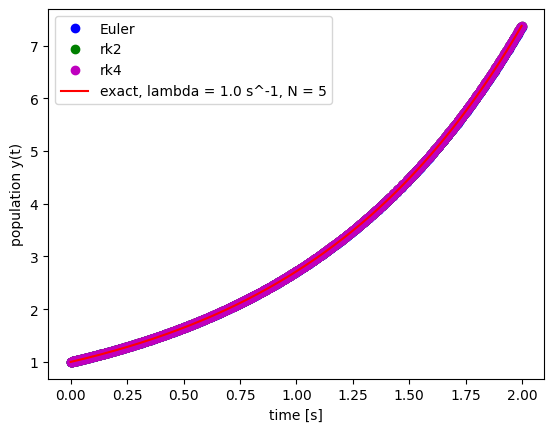

In [4]:
for j in range(N-1):
    ye[j+1] = euler(ye[j], t[j], dt, growth)

for j in range(N-1):
    yrk2[j+1] = rk2(yrk2[j], t[j], dt, growth)

for j in range(N-1):
    yrk4[j+1] = rk4(yrk4[j], t[j], dt, growth)

ya = yo*np.exp(lbda*t)

plt.plot(t,ye,"bo",label="Euler")
plt.plot(t,yrk2,"go",label="rk2")
plt.plot(t,yrk4,"mo",label="rk4")
plt.plot(t,ya,"r",label="exact, lambda = 1.0 s^-1, N = 5")
plt.xlabel ('time [s]')
plt.ylabel ('population y(t)')
plt.legend()

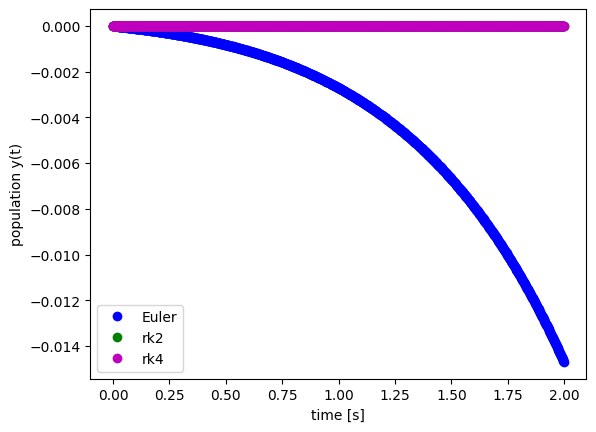

In [5]:
for j in range(N-1):
    ye[j+1] = euler(ye[j], t[j], dt, growth)

for j in range(N-1):
    yrk2[j+1] = rk2(yrk2[j], t[j], dt, growth)

for j in range(N-1):
    yrk4[j+1] = rk4(yrk4[j], t[j], dt, growth)

ya = yo*np.exp(lbda*t)

plt.plot(t,ye-ya,"bo",label="Euler")
plt.plot(t,yrk2-ya,"go",label="rk2")
plt.plot(t,yrk4-ya,"mo",label="rk4")
plt.xlabel ('time [s]')
plt.ylabel ('population y(t)')
plt.legend()
